In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import mixture
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
#all rendering 'internal' to the notebook:
%matplotlib inline

In [ ]:
# While doing PCA - do NOT Include RESPONSE Variable - Attrition 
# Do NOT include - Binomial Or Categorical Variables - Categorical can be included with advanced methods 
# Advanced methods listed here- http://stats.stackexchange.com/questions/14002/whats-the-difference-between-principal-component-analysis-and-multidimensional/14013#14013
# Advanced methods out of scope for now . 

In [30]:
# Pre Process- Data for PCA

df=pd.read_csv('hr.tsv',sep='\t')
df.head(5)

# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
# Read TSV with \t 



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [47]:
mymap = {'Yes':1,'No':0,'Travel_Rarely':1, 'Travel_Frequently': 2 ,'Non-Travel':3, 'Research & Development' :1 , 
         'Human Resources':2,'Sales':3,'Life Sciences':1,'Medical':6,'Technical Degree':3,'Marketing':4,'Other':5,
        'Female':1, 'Male':2,'Research Scientist':1,'Laboratory Technician':2,'Healthcare Representative':3,
         'Manufacturing Director':4,'Manager':5,'Sales Representative':6,'Research Director':7,'Sales Executive':8,
        'Single':1,'Married':2,'Divorced':3}#Medical = 6 as HR =2 in another column

#
dfh =df.applymap(lambda s: mymap.get(s) if s in mymap else s)
#
dfh.head(5)
#
# In mymap == Yes =1 and No =0 - replacements made in both Attrition and OverTime
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html

#dfh.to_csv('dfh.csv')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,3,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,5,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,6,1,5,...,4,80,1,6,3,3,2,2,2,2


In [48]:
print dfh["Attrition"].value_counts() # Here - 0 == Live Employee , 1 == Exited Employee / Attrited Employee 


0    2466
1     474
Name: Attrition, dtype: int64


In [49]:
# TBD ----- 05 DE   .........Create dfpca

#dfpca = dfh.drop(df.columns[[1,2,4,5]],axis=1,inplace=False) # This is OK 
# Now we need to drop more columns - how again drop from dfpca ? ??
# 
# dfpca.head(5)


# http://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
# df.drop(df.columns[[0, 1, 3]], axis=1)  # df.columns is zero-based pd.Index 
# in Pandas axis=1 -- means ------------->>> AXIS along the Rows - WEST to EAST 
# axis=0 --- means ------------->>> AXIS along the Columns - NORTH to SOUTH 
#drop_list = ['Department','Education','EducationField'] # Such a list wont work 


,Age,DailyRate,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,1,1,1,2,1,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,279,1,1,1,2,3,2,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,5,1,3,4,2,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,4,1,1,4,4,1,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,591,1,6,1,5,1,2,40,3,...,4,80,1,6,3,3,2,2,2,2


In [4]:
## TBD -- 05 DEC 


# Convert DF to Numpy Array 
# 1st Numpy Array == X , only features 
# 2nd Numpy Array == y , only target Labels
#

import numpy as np

X = df.iloc[:,1:21].values # Choosing Features - 1 to 21 knowing that 0 [Column 1 of CSV] is Class Label Attrition
y = df.iloc[:,0].values
#
print type(X)
print type(y)
#
print X.shape
print y.shape
#
print X
print y
print "__________________"
print('Class labels:', np.unique(y))

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(2940, 20)
(2940,)
[[ 1  1  2 ...,  6  0  5]
 [ 2  1  4 ..., 10  1  7]
 [ 1  1  7 ...,  0  0  0]
 ..., 
 [ 1  1  6 ...,  6  0  3]
 [ 2  1  2 ...,  9  0  8]
 [ 1  1  7 ...,  4  1  2]]
[1 0 1 ..., 0 0 0]
__________________
('Class labels:', array([0, 1]))


In [13]:
# Correlation from DF Data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

corr_dfx = dfx.corr(method='pearson')

#print("--------------- CORRELATIONS ---------------")
print(corr_dfx.head(len(dfx)))

# We can look at Column 1 of the Print out below - see what all Features have a 
# greater than 0.1 Corr value - Negative or Positive both considered . 

'''
# Positive Corr
## Negative Corr

--------------- CORRELATIONS ---------------
                          Attrition  
Attrition                  1.000000  
BusinessTravel             0.127006  #
DistanceFromHome           0.085674  
JobRole                   -0.061889  
OverTime                  -0.246118  ##
TotalWorkingYears         -0.167349  ##
Age                       -0.159205  ##
Education                 -0.031373  
EnvironmentSatisfaction   -0.103369  ##
JobInvolvement            -0.130016  ##
JobLevel                  -0.169105  ##
JobSatisfaction           -0.103481  ##
MonthlyIncome             -0.159840  ##
NumCompaniesWorked         0.043494  
RelationshipSatisfaction  -0.045872  
StockOptionLevel          -0.137145  ##
TrainingTimesLastYear     -0.059478  
WorkLifeBalance           -0.063939  
YearsAtCompany            -0.134392  ##
YearsSinceLastPromotion   -0.033019  
YearsWithCurrManager      -0.156199  ##

'''



                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.005175  -0.025742          0.016464   0.020950   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014 

'\n# Positive Corr\n## Negative Corr\n\n--------------- CORRELATIONS ---------------\n                          Attrition  \nAttrition                  1.000000  \nBusinessTravel             0.127006  #\nDistanceFromHome           0.085674  \nJobRole                   -0.061889  \nOverTime                  -0.246118  ##\nTotalWorkingYears         -0.167349  ##\nAge                       -0.159205  ##\nEducation                 -0.031373  \nEnvironmentSatisfaction   -0.103369  ##\nJobInvolvement            -0.130016  ##\nJobLevel                  -0.169105  ##\nJobSatisfaction           -0.103481  ##\nMonthlyIncome             -0.159840  ##\nNumCompaniesWorked         0.043494  \nRelationshipSatisfaction  -0.045872  \nStockOptionLevel          -0.137145  ##\nTrainingTimesLastYear     -0.059478  \nWorkLifeBalance           -0.063939  \nYearsAtCompany            -0.134392  ##\nYearsSinceLastPromotion   -0.033019  \nYearsWithCurrManager      -0.156199  ##\n\n'

--------------- CREATE A HEATMAP ---------------


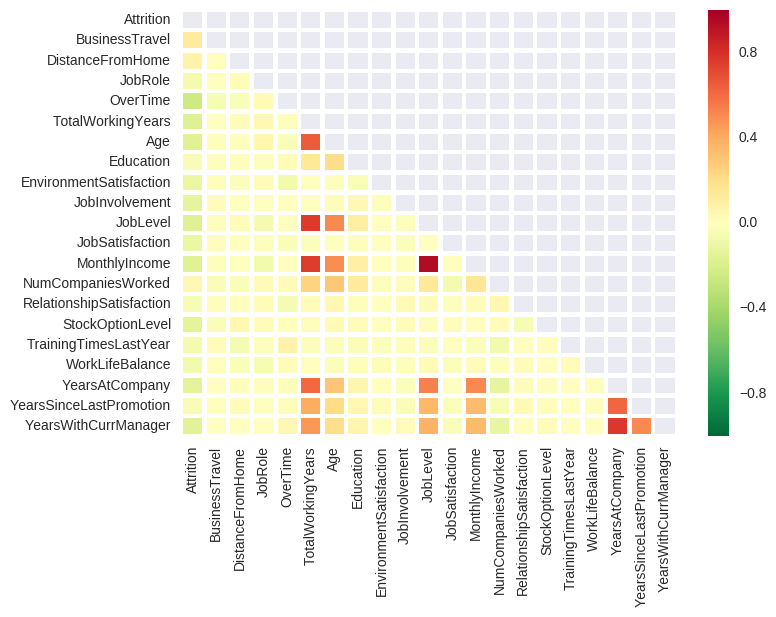

In [6]:
print("--------------- CREATE A HEATMAP ---------------")
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
seaborn.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

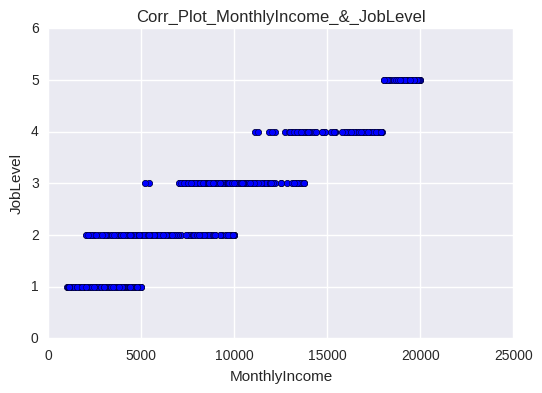

In [11]:
plt.scatter(dfx['MonthlyIncome'], dfx['JobLevel'])
plt.xlabel('MonthlyIncome')
plt.ylabel('JobLevel')
plt.title('Corr_Plot_MonthlyIncome_&_JobLevel')
plt.show()

# We can see a Positive Correlation 

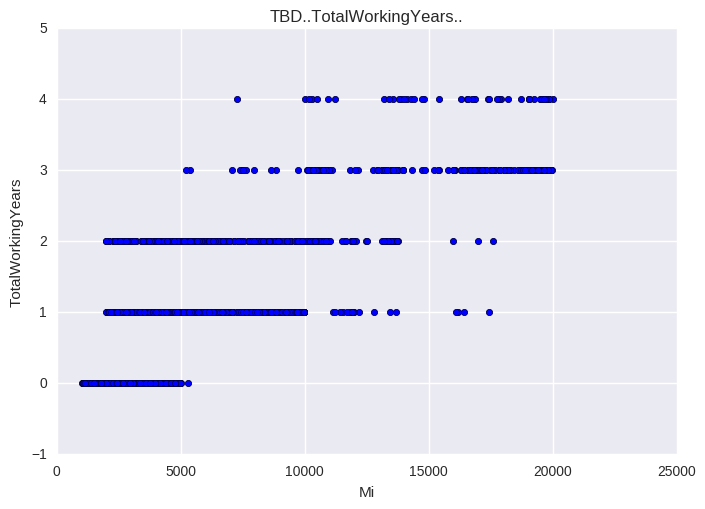

In [11]:
plt.scatter(df['MonthlyIncome'], df['TotalWorkingYears'])
plt.xlabel('MonthlyIncome')
plt.ylabel('TotalWorkingYears')
plt.title('Corr_Plot_TotalWorkingYears_&_MonthlyIncome')
plt.show()

# Strong Positive Correlation 


In [12]:
# Utility === # Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
import random
random.seed(123)

# Splitting data into 70% training and 30% test data:

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(2058, 20)
(882, 20)
(2058,)
(882,)


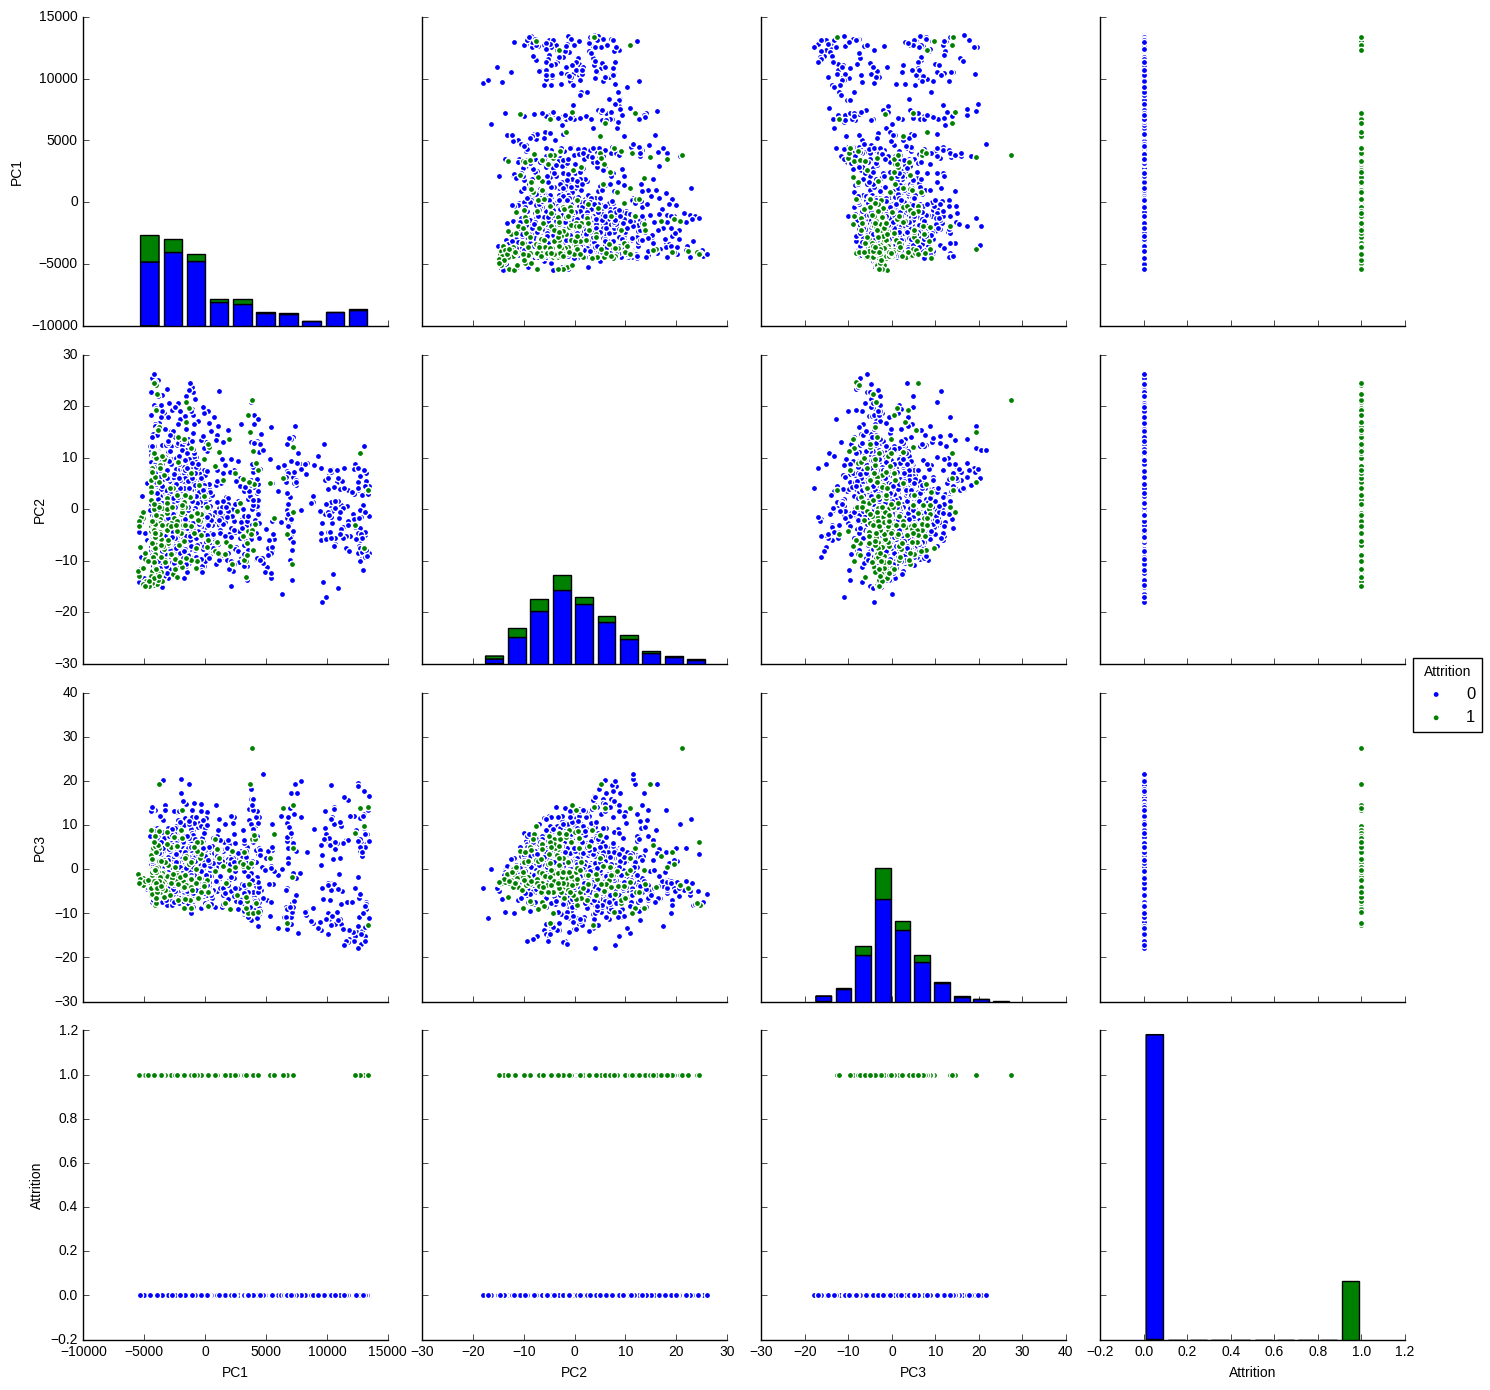

In [42]:
# TBD -- 02 DEC 

import seaborn.apionly as sns
%matplotlib inline

hr_pca = PCA(n_components=3).fit_transform(df)
hr_pca_df = pd.DataFrame(hr_pca,columns=('PC1','PC2','PC3'))
hr_pca_df.insert(3,"Attrition",df["Attrition"])
#
sns.pairplot(hr_pca_df, hue="Attrition", size=3.5)
#


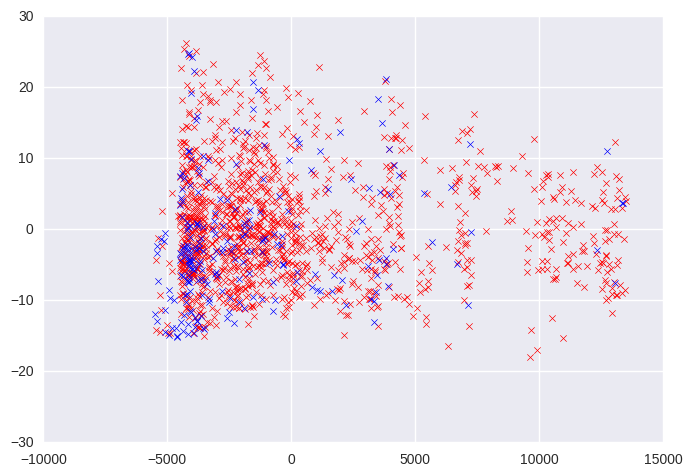

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
reduced_X = pca.fit_transform(X)

# For plotting 
red_x, red_y = [], []
blue_x, blue_y = [], []
#
for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='x')

plt.show()

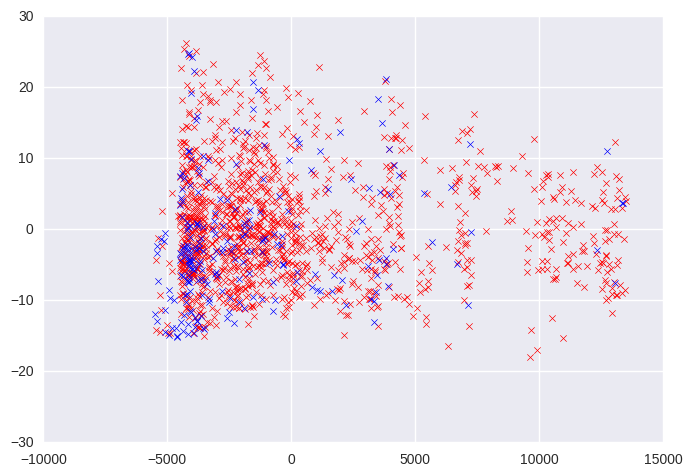

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

# For plotting 
red_x, red_y = [], []
blue_x, blue_y = [], []
#
for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='x')

plt.show()

In [15]:
#TBD -- 02 DEC 

#Classifier - LogisticRegression
from sklearn.linear_model.logistic import LogisticRegression
#
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
#
predictions = classifier.predict(X_test)
for i, prediction in enumerate(predictions[:11]):
    #print 'Prediction: %s. Message: %s' % (prediction, X_test[i])
    print 'Prediction: %s. ' % (prediction)

Prediction: 0. 
Prediction: 1. 
Prediction: 0. 
Prediction: 0. 
Prediction: 0. 
Prediction: 0. 
Prediction: 0. 
Prediction: 0. 
Prediction: 0. 
Prediction: 0. 
Prediction: 0. 


In [16]:
#TBD -- 02 DEC 

#Classifier - LogisticRegression
from sklearn.linear_model.logistic import LogisticRegression
#
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
#
predictions = classifier.predict(X_test)
for i, prediction in enumerate(predictions[:11]):
    #print 'Prediction: %s. Message: %s' % (prediction, X_test[i])
    print 'Prediction: %s. ' % (prediction)

Prediction: 0. 
Prediction: 1. 
Prediction: 0. 
Prediction: 0. 
Prediction: 0. 
Prediction: 0. 
Prediction: 0. 
Prediction: 0. 
Prediction: 0. 
Prediction: 0. 
Prediction: 0. 


In [17]:
#TBD -- 02 DEC 

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

/home/dhankar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/dhankar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


ValueError: num must be 1 <= num <= 4, not 5

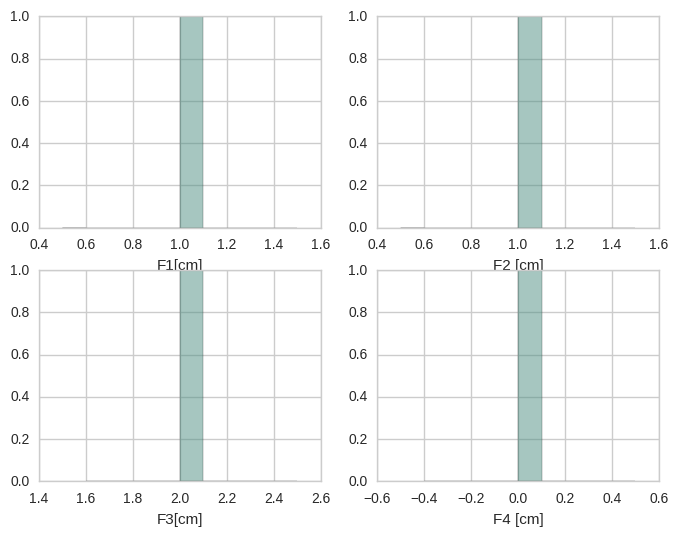

In [18]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Live Employee',
              2: 'Attrited Employee'
              }

feature_dict = {0: 'F1[cm]',
                1: 'F2 [cm]',
                2: 'F3[cm]',
                3: 'F4 [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(5):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Live Employee', 'Attrited Employee'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()



In [19]:
# Standardizing and Rescaling - to be done for all Features besides LABELs or TARGET Feature which is ATTRITION 
# We dont operate on y_test OR y_train below -only X_train and X_test ... 


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test) #@@@TBD --- Why not do a sc.fit(X_test) ? Are we not scaling the Test Set ? 

### Describe the - numpy.ndarray
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html

import scipy as sp
sp.stats.describe(X_test_std)

### These Features are scaled to Mean ==0 and STD ==1 

print "________________"
print('Feature == Attrition - Mean after Standardizing and Rescaling = {:.4f}'.format(X_train_std[:,0].mean()))
print('Feature == BusinessTravel - Mean after Standardizing and Rescaling = {:.7f}'.format(X_train_std[:,1].mean()))
#print('Feature == Department- Mean after Standardizing and Rescaling = {:.5f}'.format(X_train_std[:,2].mean()))
print "________________"
print "Standard deviations after standardization:"
print('Feature == Attrition - STD after standardization = {:.2f}'.format(X_train_std[:,0].std()))
print('Feature == BusinessTravel - STD after standardization = {:.2f}'.format(X_train_std[:,1].std()))
#print('Feature == Department- STD after standardization = {:.2f}'.format(X_train_std[:,2].std()))
#

# The values below are Not scaled to Mean ==0 and STD ==1 

print "________________"
print('Feature == Attrition - Mean after Standardizing and Rescaling = {:.4f}'.format(X_test_std[:,0].mean()))
print('Feature == BusinessTravel - Mean after Standardizing and Rescaling = {:.7f}'.format(X_test_std[:,1].mean()))
#print('Feature == Department- Mean after Standardizing and Rescaling = {:.5f}'.format(X_test_std[:,2].mean()))
print "________________"
print "Standard deviations after standardization:"
print('Feature == Attrition - STD after standardization = {:.2f}'.format(X_test_std[:,0].std()))
print('Feature == BusinessTravel - STD after standardization = {:.2f}'.format(X_test_std[:,1].std()))
#print('Feature == Department- STD after standardization = {:.2f}'.format(X_test_std[:,2].std()))
#
# If we Dont - Round Off or Format , we would have == 9.12346539964e-17 in place of 0.00 
# Further Reading --- https://docs.python.org/2/tutorial/floatingpoint.html
#

________________
Feature == Attrition - Mean after Standardizing and Rescaling = 0.0000
Feature == BusinessTravel - Mean after Standardizing and Rescaling = 0.0000000
________________
Standard deviations after standardization:
Feature == Attrition - STD after standardization = 1.00
Feature == BusinessTravel - STD after standardization = 1.00
________________
Feature == Attrition - Mean after Standardizing and Rescaling = 0.0599
Feature == BusinessTravel - Mean after Standardizing and Rescaling = 0.0683742
________________
Standard deviations after standardization:
Feature == Attrition - STD after standardization = 0.98
Feature == BusinessTravel - STD after standardization = 1.04


/home/dhankar/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [20]:
# Perceptron Test 1 

from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [21]:
y_test.shape

(882,)

In [22]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())


Misclassified samples: 138


In [23]:
# Source of HR - Employee Attrition Data == WATSON Sample Data Sets
# https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/

#
# Before we proceed with kNN or any other Classification technique ,we need -Feature Reduction. 
# Reducing the Number of Features or Variables ,which are utilized to Classify -Employees Attrition Risk. 
# Basic feature reductiion techniques :-

# 1- Factor Analysis - Factor Analysis is a generic term used for Analysis of Factors . PCA is best option. 
# 2- Principal Component Analysis - PCA (Done)
#
# Why PCA -Further reading :-
# http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html#sphx-glr-auto-examples-plot-compare-reduction-py
#
#
# I have undertaken PCA for the IBM WATSON ANALYTICS SAMPLE - Employee Attrition Dataset 
#
# Standardize Variables :- "Democracy amongst Variables" - Ensure All Features have - MEAN = 0 and Variance = 1 
#
# As a further investigation - we need Survival Analysis 
# Survival Analysis predicts - when an employee is most likely to Churn or Exit. 
#

In [29]:
# Sklearn Feature_Selection SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df
X.shape 
# this is - (2940, 33)

X_new = SelectKBest(chi2, k=10).fit_transform(X,y)
X_new.shape
# this is - (2940, 10)

# "y" - is Numpy Array - which is Class labels / Target - Attrition . 
#
# Further Reading == fit_transform(X, y=None, **fit_params)[source]
# Further Reading == http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

print X_new[:,0] # 1st Feature of X_new Numpy Array / Matrix is -- Attrition #[1 0 1 ..., 0 0 0]
print X_new[:,1] # 2nd Feature of X_new Numpy Array / Matrix is -- DistanceFromHome # [1 1 1 ..., 1 2 1]
print X_new[:,2] # 3rd Feature of X_new Numpy Array / Matrix is -- Age # [41 49 37 ..., 27 49 34]
#....
#....
print X_new[:,5] # 5th Feature of X_new Numpy Array / Matrix is -- MonthlyRate
print X_new[:,6] # 6th Feature of X_new Numpy Array / Matrix is -- StockOptionLevel

[1 0 1 ..., 0 0 0]
[0 1 0 ..., 0 1 1]
[1 1 1 ..., 1 2 1]
[5993 5130 2090 ..., 6142 5390 4404]
[0 1 0 ..., 1 0 0]


In [31]:
# TBD Yes --- 

from scipy.stats import pearsonr

#pearsonr ([1,2,3], [1,2,4.9])

# Changing Only Last Value of the 2Nd Array 
#
# 3.1 == (0.99962228516121843, 0.017498096813278487)
# 3.9 == (0.9843241382880894, 0.11287033095824481)
# 4.9 == (0.96264511708416145, 0.17455411192039688)
# 

#pearsonr (X_new[:,6],X_new[:,5])
#(-0.034322830206660965, 0.062772239303960323)

# pearsonr (X_new[:,0],X_new[:,1])
# (-0.16734900684388931, 6.5656643456574026e-20)

# pearsonr (X_new[:,0],X_new[:,2])
#(-0.1592050068657796, 3.8159365770771105e-18)

#pearsonr (X_new[:,0],X_new[:,3])
#(-0.056651991867629273, 0.0021196621408998352)

pearsonr (X_new[:,0],X_new[:,3])

(-0.1592050068657796, 3.8159365770771105e-18)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dfn)
#
print "_________pca.components_as seen below___________"
print "________________________________________________"
#
print(pca.components_)
#
print "_________pca.explained_variance_ as seen below___________"
print "________________________________________________"
#
#
print(pca.explained_variance_)
#
#





_________pca.components_as seen below___________
[[  5.60015339e-07  -6.57015488e-07   2.06642142e-07   1.18173150e-06
    1.00528528e-06   2.91003534e-06  -5.56751860e-06  -2.24292831e-06
   -1.36460621e-06   6.01591112e-06   5.31775796e-05  -1.81530273e-03
   -3.37733982e-06   0.00000000e+00   7.22970718e-04   5.73781232e-06
   -4.48321505e-05  -1.67050492e-06   1.01292955e-05   6.88799468e-08
    4.08321871e-02   9.99164105e-01   7.55269484e-06  -3.67989003e-06
   -5.19953077e-07  -5.13997994e-07  -4.08423733e-06   1.59135339e-07
    8.71582497e-07  -8.37786140e-06  -1.51527239e-06   4.92359398e-06
   -1.37326536e-05]
 [ -1.25792842e-05  -1.46316523e-06  -6.87474391e-06  -6.93608582e-07
    1.42498854e-05   3.05387216e-06  -3.30547887e-05   1.19465592e-05
   -4.57051948e-07   1.64809980e-04   9.63953002e-04   8.38787854e-04
    2.10345050e-05  -0.00000000e+00  -1.41330050e-03  -1.99536890e-06
   -6.42178525e-05  -2.15791490e-06   2.23154584e-04  -1.68612203e-06
    9.99163931e-01  -

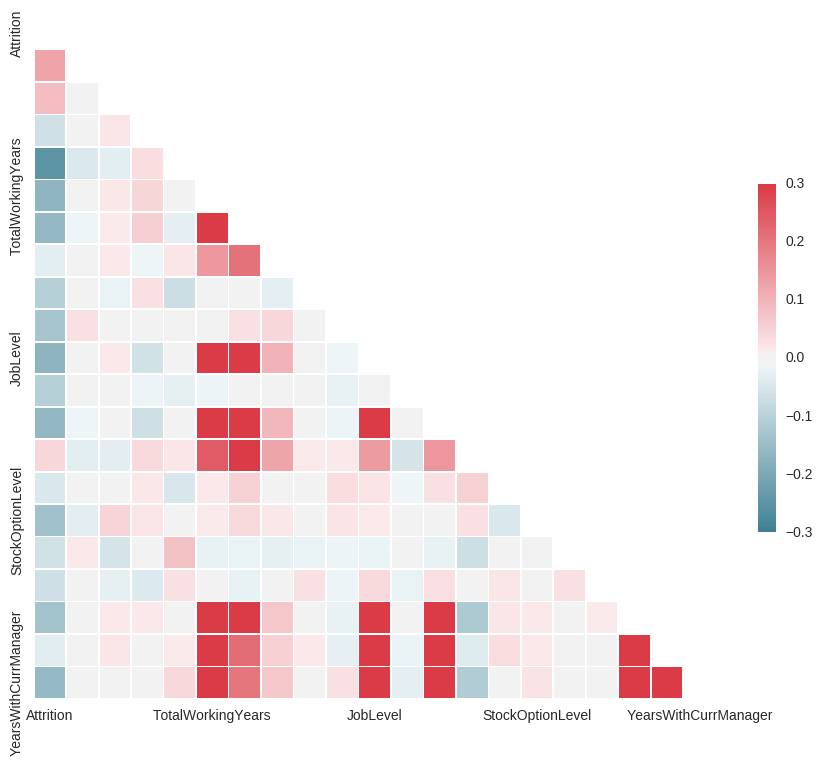

In [33]:
# TBD --02 DEC 

from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

'''
# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(letters[:26]))
'''


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


In [41]:
# TBD -- 02 DEC 

import seaborn.apionly as sns
%matplotlib inline

#@@@@@@Hold -- Only Continous variables for Scatter --------------------------------------------@@@@@
# 
#df.plot(kind="scatter", x="WorkLifeBalance", y="JobSatisfaction") # Ignore ---

#sns.FacetGrid(df, hue="", size=5).map(plt.scatter,"WorkLifeBalance","JobSatisfaction").add_legend()

In [24]:
hr_pca_df.head(10)

,PC1,PC2,PC3,Attrition
0,5139.149743,-718.097222,1478.877853,1
1,10528.870781,-1802.677691,1470.622372,0
2,-12089.429247,-3920.126939,1472.739382,1
3,8689.624185,-3949.537483,1487.703399,0
4,2192.360494,-3125.192215,1468.131411,0
5,-2588.739283,-3329.828398,1470.287790,0
6,-4503.979185,-3649.635096,1473.291476,0
7,-1134.919783,-3764.291784,1475.523087,0
8,-5398.036696,3247.748922,1443.476599,0
9,2208.354933,-1354.826240,1471.664815,0


In [4]:
#Seaborn library good for pairs:
import seaborn.apionly as sns
%matplotlib inline
sns.set()
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", size=2.5)



ValueError: n_components=4 must be between 0 and n_features=2 with svd_solver='full'

In [ ]:

# PCA 

import numpy as np
from sklearn.decomposition import PCA

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,svd_solver='auto', tol=0.0, whiten=False)


In [2]:

print(pca.explained_variance_ratio_) 

# 

[ 0.99244289  0.00755711]


In [37]:
import numpy as np
from sklearn.model_selection import train_test_split

trainSet, testSet = train_test_split(df, test_size = 0.2)

In [38]:
print 'Train Length : ' + repr(len(trainSet))
print 'Test Length: ' + repr(len(testSet))

Train Length : 2352
Test Length: 588


In [39]:
df.groupby('Attrition').describe() 

# 0 == Employee ALIVE in system 
# 1 == Employee ATTRITED  


Age  BusinessTravel    DailyRate   Department  \
Attrition                                                                
0         count  2466.000000     2466.000000  2466.000000  2466.000000   
          mean     37.561233        1.056772   812.504461     1.630170   
          std       8.886557        0.526788   403.126584     0.562058   
          min      18.000000        0.000000   102.000000     0.000000   
          25%      31.000000        1.000000   477.000000     1.000000   
          50%      36.000000        1.000000   817.000000     2.000000   
          75%      43.000000        1.000000  1176.000000     2.000000   
          max      60.000000        2.000000  1499.000000     2.000000   
1         count   474.000000      474.000000   474.000000   474.000000   
          mean     33.607595        1.240506   750.362869     1.510549   
          std       9.679102        0.533413   401.474454     0.593209   
          min      18.000000        0.000000   103.000000     0.000000   
          25%      28.000000        1.000000   408.000000     1.000000   
          50%      32.000000        1.000000   699.000000     2.000000   
          75%      39.000000        2.000000  1092.000000     2.000000   
          max      58.000000        2.000000  1496.000000     2.000000   

                 DistanceFromHome    Education  EducationField  EmployeeCount  \
Attrition                                                                       
0         count       2466.000000  2466.000000     2466.000000         2466.0   
          mean           1.413625     2.927007        1.436334            1.0   
          std            0.707566     1.026793        0.906704            0.0   
          min            1.000000     1.000000        0.000000            1.0   
          25%            1.000000     2.000000        1.000000            1.0   
          50%            1.000000     3.000000        1.000000            1.0   
          75%            2.000000     4.000000        2.000000            1.0   
          max            3.000000     5.000000        4.000000            1.0   
1         count        474.000000   474.000000      474.000000          474.0   
          mean           1.582278     2.839662        1.468354            1.0   
          std            0.790123     1.007178        1.042465            0.0   
          min            1.000000     1.000000        0.000000            1.0   
          25%            1.000000     2.000000        1.000000            1.0   
          50%            1.000000     3.000000        1.000000            1.0   
          75%            2.000000     4.000000        2.000000            1.0   
          max            3.000000     5.000000        4.000000            1.0   

                 EmployeeNumber  EnvironmentSatisfaction  \
Attrition                                                  
0         count     2466.000000              2466.000000   
          mean      1472.429035                 2.771290   
          std        850.322568                 1.070915   
          min          2.000000                 1.000000   
          25%        736.250000                 2.000000   
          50%       1471.000000                 3.000000   
          75%       2205.750000                 4.000000   
          max       2940.000000                 4.000000   
1         count      474.000000               474.000000   
          mean      1460.464135                 2.464135   
          std        841.962823                 1.168554   
          min          1.000000                 1.000000   
          25%        736.000000                 1.000000   
          50%       1466.500000                 3.000000   
          75%       2202.750000                 4.000000   
          max       2932.000000                 4.000000   

                         ...           PerformanceRating  \
Attrition                ...                               
0         count          ...    

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0056defd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb0055ec290>], dtype=object)

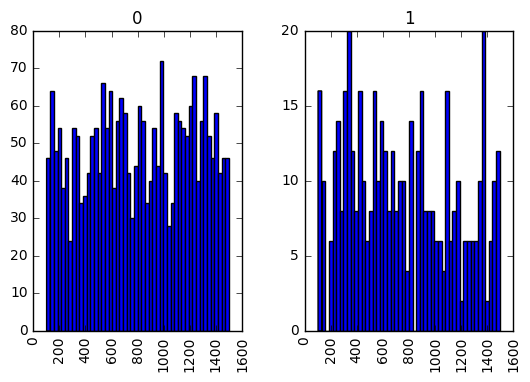

In [42]:
df.hist(column='DailyRate', by='Attrition', bins=50)

# The Feature == DailyRate doesnt seem to be Correlated to Attrittion 

In [1]:
# All Test Cells Below this --------------- Delete------------------


from numpy import *
import operator 

def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    lables = ['A','A','B','B']
    return group , lables



In [2]:
group,labels = createDataSet()


In [3]:
print group
print labels

[[ 1.   1.1]
 [ 1.   1. ]
 [ 0.   0. ]
 [ 0.   0.1]]
['A', 'A', 'B', 'B']


In [4]:
type(group)

numpy.ndarray

In [5]:
type(labels)

list

In [6]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]

    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances ** 0.5
    
    sortedDistIndicies = distances.argsort()

    # Voting with lowest k distances
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

    # Decompose into a list of tuples and sort by second item
    sortedClassCount = sorted(classCount.iteritems(),
        key=operator.itemgetter(1), reverse=True)

    return sortedClassCount[0][0]


In [7]:
group, labels = createDataSet()
classify0([1,0], group, labels, 3)

'B'

In [8]:
def file2matrix(filename):
	fr = open(filename)
	arrayOLines = fr.readlines()
	numberOfLines = len(arrayOLines)
	returnMat = zeros((numberOfLines,3))
	classLabelVector = []
	index = 0
	for line in arrayOLines:
		line = line.strip()
		listFromLine = line.split('\t')
		returnMat[index,:] = listFromLine[0:3]
		classLabelVector.append(int(listFromLine[-1]))
		index += 1
	return returnMat,classLabelVector


In [10]:
datingDataMat,datingLabels = file2matrix('dfh1.csv')

ValueError: invalid literal for float(): 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33

In [13]:
print datingDataMat
print "_____________________"
print type(datingDataMat) #<type 'numpy.ndarray'>

print "_____________________"
print "First Five Observations from Column-1 [FREQ FLIER MILES] :--" , datingDataMat[0:5,0] # 0 == Column1

print "_____________________"
print "First Five Observations from Column-2 :--" , datingDataMat[0:5,1] # 1 == Column2

print "_____________________"
print "First Five Observations from Column-3 :--" , datingDataMat[0:5,2] # 2 == Column3




[[  4.09200000e+04   8.32697600e+00   9.53952000e-01]
 [  1.44880000e+04   7.15346900e+00   1.67390400e+00]
 [  2.60520000e+04   1.44187100e+00   8.05124000e-01]
 ..., 
 [  2.65750000e+04   1.06501020e+01   8.66627000e-01]
 [  4.81110000e+04   9.13452800e+00   7.28045000e-01]
 [  4.37570000e+04   7.88260100e+00   1.33244600e+00]]
_____________________
<type 'numpy.ndarray'>
_____________________
First Five Observations from Column-1 [FREQ FLIER MILES] :-- [ 40920.  14488.  26052.  75136.  38344.]
_____________________
First Five Observations from Column-2 :-- [  8.326976   7.153469   1.441871  13.147394   1.669788]
_____________________
First Five Observations from Column-3 :-- [ 0.953952  1.673904  0.805124  0.428964  0.134296]


In [14]:
print datingLabels[0:15] # Print the First 15 List Elements , of Data Lables Converted to NUM...

print type(datingLabels) # Print TYPE == LIST

#  love_dictionary={'largeDoses':3, 'smallDoses':2, 'didntLike':1}

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1]
<type 'list'>


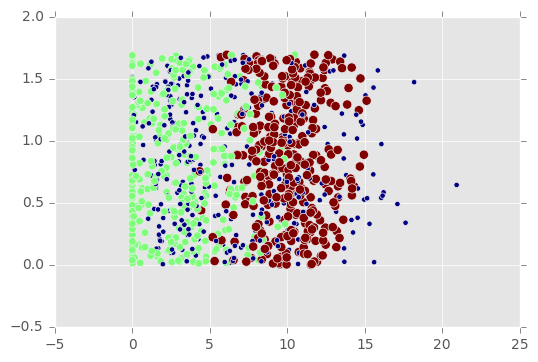

In [15]:
%matplotlib inline
# 
import pandas as pd
from pandas.tseries.resample import TimeGrouper
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(datingDataMat[:,1], datingDataMat[:,2]) # Initial Line changed below ---- 

ax.scatter(datingDataMat[:,1], datingDataMat[:,2],
15.0*array(datingLabels), 15.0*array(datingLabels))
plt.show()

# TBD -- .set_ylabel('Time Spent Playing Video Games')
# TBD -- .set_xlabel('Freq Flier Miles')


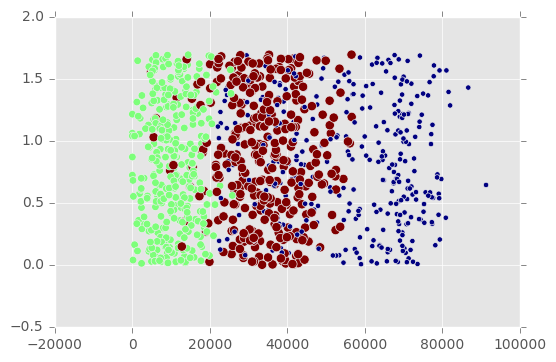

In [16]:

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(datingDataMat[:,1], datingDataMat[:,2]) # Initial Line changed below ---- 

ax.scatter(datingDataMat[:,0], datingDataMat[:,2],
15.0*array(datingLabels), 15.0*array(datingLabels))
plt.show()

# TBD -- .set_ylabel('Ice Cream Consumption')
# TBD -- .set_xlabel('Frequent Flier Miles ')


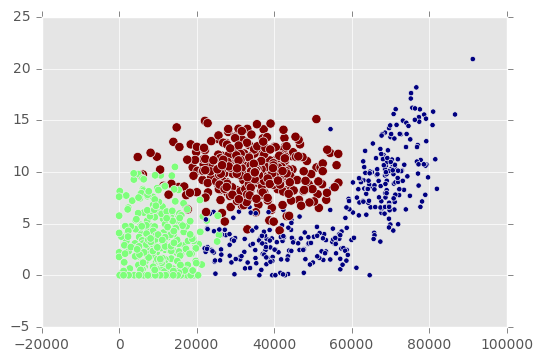

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(datingDataMat[:,1], datingDataMat[:,2]) # Initial Line changed below ---- 

ax.scatter(datingDataMat[:,0], datingDataMat[:,1],
15.0*array(datingLabels), 15.0*array(datingLabels))
# TBD --- fig.legend((l1, l2,l3), ('Line 1', 'Line 2','Line3'), 'upper left')
plt.show()

# TBD -- .set_ylabel('Time Spent Playing Video Games')
# TBD -- .set_xlabel('Freq Flier Miles')


In [18]:
def autoNorm(dataSet):
    minVals = dataSet.min(0) # Numpy Array of - Min Values - from each Column of dataSET
    maxVals = dataSet.max(0) # Max Values from each Column of dataSET
    ranges = maxVals - minVals 
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))   #element wise divide
    return normDataSet, ranges, minVals


In [24]:
# Testing ---

minVals = datingDataMat.min(0) # Min Values from each Column of dataSET

#type(minVals) # numpy.ndarray

print minVals

[ 0.        0.        0.001156]


In [25]:
# Testing ---

maxVals = datingDataMat.max(0) # Max Values from each Column of dataSET

#type(maxVals) # numpy.ndarray

print maxVals # These have been checked to be correct from RAW Text File 

[  9.12730000e+04   2.09193490e+01   1.69551700e+00]


In [30]:
#Testing ---

normDataSet = zeros(shape(datingDataMat))

print normDataSet

#type(normDataSet) # numpy.ndarray

m = datingDataMat.shape[0]

#type(m) <int>

print m  # This m is == 1000 which shows that our datingDataMat [ Matrix or NumpyArray ] is shaped == 1000X3 
# As we have our MinVals and MaxVals shaped == 1X3 - as seen above they are just 1 Row of 3 Data points each 
# We will use Numpy Tiles to fill up a 1000X3 Matrix - Further TBD ........


[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 ..., 
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
1000


In [19]:
normDataSet, ranges, minVals=autoNorm(datingDataMat)

In [22]:
#Seeing the Results of Normalization of Matrix 

print "First Five Observations from Column-1 [FREQ FLIER MILES] of datingDataMat:--" , datingDataMat[0:5,0] # 0 == Column1

print "____________###___________________"

print "First Five Observations from Column-1 [FREQ FLIER MILES] of datingDataMat:--" , normDataSet[0:5,0] # 0 == Column1



First Five Observations from Column-1 [FREQ FLIER MILES] of datingDataMat:-- [ 40920.  14488.  26052.  75136.  38344.]
____________###___________________
First Five Observations from Column-1 [FREQ FLIER MILES] of datingDataMat:-- [ 0.44832535  0.15873259  0.28542943  0.82320073  0.42010233]


In [37]:
#As the data is Normalized now - we can split into 90% TRAINING and 10%TEST 

def datingClassTest():
    hoRatio = 0.10      #Hold Out Ratio - Hold Out Test Set .... 
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print "the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i])
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print "the total error rate is: %f" % (errorCount/float(numTestVecs))
    print errorCount

# If we RUN this Cell we get --- NameError: name 'errorCount' is not defined
# Ignore this is a Function Definition Cell - Need not be run ...
#


In [38]:
datingClassTest()

print "_____________________"

print errorCount # NameError: name 'errorCount' is not defined

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

NameError: name 'errorCount' is not defined